# Python Project

## Greesham Simon & Kristiyan Dimitrov

### Exercise 1

#### Part 1: Import & Compile Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
states = ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV',"NY",'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
newlist = []
columns = ['state','sex','year','name','number']

for state in states:
    path = 'namesbystate/' + state + '.TXT'
    df = pd.read_csv(path, names = columns)
    newlist.append(df)
names = pd.concat(newlist,ignore_index = True) # This is doing row-wise concatenation

names.to_csv("names.csv", index = False) # Export as single csv file

#### Part 2: Create a library class called BabyNames

In [24]:
class BabyNames:
    
    # 1. Constructor

    def __init__(self, filepath):
        self.data = pd.read_csv(filepath)
    # ------------------------------------------------------------------------------------------------------        
    # 2. Count (state=’’, year=’’): returns the total number of births. 
    # A blank state or year should return all births of the empty input.
    
    def Count(self, state = None, year = None):
        if state is None and year is None:
            result = self.data.number.sum()
            return result
        
        elif state is None:
            result = self.data[self.data.year == year].groupby('year').number.sum()
            return result
        
        elif year is None:
            result = self.data[self.data.state == state].groupby('state').number.sum()
            return result
        
        result = self.data[(self.data.year == year) & (self.data.state == state)].groupby(['state','year']).number.sum()
        return result
    # ------------------------------------------------------------------------------------------------------    
    # 3. Top10BabyNames (state=’IL’, year=2015): your output should look like(empty state means all, same for year):

    def Top10BabyNames(self, state = None, year = None):
        if state is None and year is None:
            # Top Male Names
            male_indices = self.data['sex'] == 'M' # Find the indices of M 
            male_names = self.data.loc[male_indices, :] # Get the df rows at those indices
            male_groupby = male_names.groupby(['name']) # Group the df by name
            male_number_sum = male_groupby.number.sum() # Sum the values for each name
            top_male_names =[name for name in male_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Top Female Names
            female_indices = self.data['sex'] == 'F'
            female_names = self.data.loc[female_indices,:]
            female_groupby = female_names.groupby(['name']) # Group the df by name
            female_number_sum = female_groupby.number.sum() # Sum the values for each name
            top_female_names =[name for name in female_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Combining Results
            top_names = pd.DataFrame({'Rank':range(1,11), 'M':top_male_names, 'F':top_female_names})
            return top_names.style.hide_index()
        
        elif state is None:
            # Top Male Names
            male_indices = (self.data['sex'] == 'M') & (self.data['year'] == year) # Find the indices of M 
            male_names = self.data.loc[male_indices, :] # Get the df rows at those indices
            male_groupby = male_names.groupby(['name']) # Group the df by name
            male_number_sum = male_groupby.number.sum() # Sum the values for each name
            top_male_names =[name for name in male_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Top Female Names
            female_indices = (self.data['sex'] == 'F') & (self.data['year'] == year)
            female_names = self.data.loc[female_indices,:]
            female_groupby = female_names.groupby(['name']) # Group the df by name
            female_number_sum = female_groupby.number.sum() # Sum the values for each name
            top_female_names =[name for name in female_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Combining Results
            top_names = pd.DataFrame({'Rank':range(1,11), 'M':top_male_names, 'F':top_female_names})
            return top_names.style.hide_index()
        
        elif year is None:
            # Top Male Names
            male_indices = (self.data['sex'] == 'M') & (self.data['state'] == state) # Find the indices of M 
            male_names = self.data.loc[male_indices, :] # Get the df rows at those indices
            male_groupby = male_names.groupby(['name']) # Group the df by name
            male_number_sum = male_groupby.number.sum() # Sum the values for each name
            top_male_names =[name for name in male_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Top Female Names
            female_indices = (self.data['sex'] == 'F') & (self.data['state'] == state)
            female_names = self.data.loc[female_indices,:]
            female_groupby = female_names.groupby(['name']) # Group the df by name
            female_number_sum = female_groupby.number.sum() # Sum the values for each name
            top_female_names =[name for name in female_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
            
            # Combining Results
            top_names = pd.DataFrame({'Rank':range(1,11), 'M':top_male_names, 'F':top_female_names})
            return top_names.style.hide_index()
            
        # Top Male Names
        male_indices = (self.data['sex'] == 'M') & (self.data['state'] == state) & (self.data['year'] == year) # Find the indices of M 
        male_names = self.data.loc[male_indices, :] # Get the df rows at those indices
        male_groupby = male_names.groupby(['name']) # Group the df by name
        male_number_sum = male_groupby.number.sum() # Sum the values for each name
        top_male_names =[name for name in male_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
        
        # Top Female Names
        female_indices = (self.data['sex'] == 'F') & (self.data['state'] == state) & (self.data['year'] == year) # Find the indices of M 
        female_names = self.data.loc[female_indices, :] # Get the df rows at those indices
        female_groupby = female_names.groupby(['name']) # Group the df by name
        female_number_sum = female_groupby.number.sum() # Sum the values for each name
        top_female_names =[name for name in female_number_sum.sort_values(ascending = False).head(10).index ] # Sorting by descending value, taking top 10 and getting the names for those top values
        
        # Combining Results
        top_names = pd.DataFrame({'Rank':range(1,11), 'M':top_male_names, 'F':top_female_names})
        return top_names.style.hide_index()
        
    # ------------------------------------------------------------------------------------------------------  
    # 4. ChangeOfPopularity (fromYear=2014, toYear=2015, top=10): 
    # This function should lists of baby names (male or female): Names that increased & decreased in popularity 
 
    def ChangeOfPopularity (self, fromYear = 1910, toYear = 2017, top = 10):
        
        # Initializing method variables:
        self.from_year = fromYear
        self.to_year = toYear
        self.top = top
        
        # Filtering only for rows that contain data for fromYear & toYear
        year_indices = (self.data['year'] == self.from_year) | (self.data['year'] == self.to_year)
        range_names = self.data.loc[year_indices, :] 
        
        
        # Group the df by name
        range_groupby = range_names.groupby(['name','year']) 
        name_range = range_groupby.number.sum().reset_index() # Output is DF with Name and it's count for the two boundary years
        
        # Reversing the 'melting process' caused by grouping
        name_range = name_range.pivot(index = 'name', values = 'number', columns = 'year')
        
        # Filling NaN with 0 for names which were not present at the fromYear
        name_range = name_range.fillna(0)
        
        # Calculating Delta b/w two years
        name_range['delta'] = name_range.iloc[:,1] - name_range.iloc[:,0] 
        name_range = name_range.sort_values(by = 'delta', ascending = False)
        
        # Extracting top results for deltas
        top_name_incr = name_range.head(top)
        top_name_decr = name_range.tail(top).sort_values(by = 'delta')
        
        return top_name_incr, '\n','\n', top_name_decr
        
    # ------------------------------------------------------------------------------------------------------  
    # 5. Top5NamesPerYear (year=2014, sex = ''): 
    # Show the five most frequent given names, by State, for male, female, or both in a given year
 
    def Top5NamesPerYear (self, year, sex = None):
        
        # Filtering for optional function argument 'sex'
        if sex != None:
            filtered_data = self.data[self.data.sex == sex]
        else:
            filtered_data = self.data
        
        # Filtering for year
        filtered_data = filtered_data[filtered_data.year == year]

        # The below two line makes sure that it doesn't matter if the same name is entered for both M & F
        filtered_data_grp = filtered_data.groupby(['state','name']) 
        state_name_number = filtered_data_grp.number.sum().reset_index()
        
        # Summing the births for each name & state (grouping & aggregating)
        state_name_number_grp = state_name_number.groupby(['state','name']).agg({'number':sum})
        
        # Sorting the data within each group and retrieving the 5 names with highest number
        state_top5_name_sorted = state_name_number_grp['number'].groupby(level = 0, group_keys = False).nlargest(5).reset_index()
        
        # Some table formatting in preparation for pivot
        state_top5_name_sorted['Rank'] = ['Rank 1','Rank 2','Rank 3','Rank 4','Rank 5'] * 51
        state_top5_name_sorted['Num'] = ['Num']*51*5
        
        # Pivoting data
        state_rank_num_pivot = state_top5_name_sorted.pivot(index = 'state', columns = 'Rank', values = ['name','number'])
        
        # Reordering & Renaming Output
        state_rank_num_pivot.columns = ['Rank 1','Rank 2','Rank 3','Rank 4','Rank 5','Num 1','Num 2','Num 3','Num 4','Num 5',]
        state_rank_num_pivot_reordered = state_rank_num_pivot[['Rank 1', 'Num 1','Rank 2', 'Num 2','Rank 3', 'Num 3','Rank 4', 'Num 4','Rank 5', 'Num 5']]
        state_rank_num_pivot_reordered.columns = ['Rank 1', 'Num','Rank 2', 'Num','Rank 3', 'Num','Rank 4', 'Num','Rank 5', 'Num']
        
        return state_rank_num_pivot_reordered

    # ------------------------------------------------------------------------------------------------------  
    # 6. NamePopularityPlot (name, yearRange, state, sex): 
    # This function will create a plot file that shows the name popularity changes over the year. 
    # Popularity is based on the proportional use of the name within a state and year
    # Defaults years to 1910 and 2017 if none specified.
    
    def NamePopularityPlot (self, name = None, yearRange = (1910,2017), state = None, sex = None):
        
        #goes rhough different possibilities of parameter selection
        #result represents the numerator of the proportion for popularity
        #result2 represents the denominator since it's not filtering on name
        if name is None:
            result = []
            print('Name is required for popularity plot')
        elif state is None and sex is None:
            result = pd.DataFrame(self.data[(self.data.year >= yearRange[0])  
               & (self.data.year <= yearRange[1]) & (self.data.name == name)].groupby('year').number.sum())
            result2 = pd.DataFrame(self.data[(self.data.year >= yearRange[0])  
               & (self.data.year <= yearRange[1])].groupby('year').number.sum())
        elif state is None:
            result = pd.DataFrame(self.data[(self.data.sex == sex) & (self.data.year >= yearRange[0])  
               & (self.data.year <= yearRange[1]) & (self.data.name == name)].groupby('year').number.sum())
            result2 = pd.DataFrame(self.data[(self.data.sex == sex) & (self.data.year >= yearRange[0])  
               & (self.data.year <= yearRange[1])].groupby('year').number.sum())
        elif sex is None:
            result = pd.DataFrame(self.data[(self.data.state == state) & (self.data.year >= yearRange[0])  
               & (x.data.year <= yearRange[1]) & (x.data.name == name)].groupby('year').number.sum())
            result2 = pd.DataFrame(self.data[(self.data.state == state) & (self.data.year >= yearRange[0])  
               & (x.data.year <= yearRange[1])].groupby('year').number.sum())
        else:
            result = pd.DataFrame(self.data[(self.data.state == state) & (self.data.sex == sex) & 
                (self.data.year >= yearRange[0]) & (self.data.year <= yearRange[1]) & 
                (self.data.name == name)].groupby('year').number.sum())
            result2 = pd.DataFrame(self.data[(self.data.state == state) & (self.data.sex == sex) & 
                (self.data.year >= yearRange[0]) & (self.data.year <= yearRange[1])].groupby('year').number.sum())

        #rename column of result2 and join with result
        result2.rename(columns={'number':'denom'}, inplace=True)
        final = result.join(result2, how = 'inner') #index is already set on year
        
        final['prop'] = final.number / final.denom

        #drop number column 
        final.drop(['number','denom'], axis = 1, inplace = True)
        
        if sex == None:
            strTitle = 'Change in Popularity: ' + name
        else:
            strTitle = 'Change in Popularity: ' + name +" (" + sex +")"
        final.plot(title=strTitle,figsize=(12,6))
    
    # ------------------------------------------------------------------------------------------------------  
    # 7. NameFlip (n): 
    # List top n names that filliped over the years. (i.e. from boy name to girl or the reverse). Provide a plot of the names showing the year.
        
    def NameFlip(self, n = 10):
        
        # Aggregating all births across States
        name_year_sex_grp = self.data.groupby(['name','year','sex']).number.sum().reset_index()
        
        # Pivoting Data so we get an M & F column for each name-year combination
        # Also filling all the NaNs with 0's
        name_year_sex_pivot = name_year_sex_grp.pivot_table(index = ['name','year'], columns = 'sex', values = 'number', aggfunc = 'sum').fillna(0)
        
        # Defining a quick function for determining which sex was predominent
        def majority(row):
            if row[0]<row[1]: 
                return 'M' 
            else: 
                return 'F'
        
        # Applying the above function as a lambda function to the data and storing result in new column called 'sexDominance'
        name_year_sex_pivot['sexDominance'] = name_year_sex_pivot.apply(lambda row: majority(row) , axis = 1)
        
        # Below we determine a flip as the popularity changing from M to F or vise-versa
        flips = []
        flips.append(0)
        for i in range(len(name_year_sex_pivot['sexDominance'])-1):
            flips.append(0)
            if name_year_sex_pivot['sexDominance'][i] != name_year_sex_pivot['sexDominance'][i+1]:
                flips[i+1] = 1
            else:
                flips[i+1] = 0
        
        # Note: the above method adds 1 flip to many names, but since it does it for many names 
        # the top ones with the most flips will still come out on top
        
        # Finally, we add the newly created flips column to the dataframe
        name_year_sex_pivot['flips'] = flips
        
        # We calculate the number of flips for each name
        names_flips = name_year_sex_pivot.groupby('name').flips.sum()
        
        # We sort in descending order by number of flips and return the top n ones
        names_flips = name_year_sex_pivot.groupby('name').flips.sum()
        names_flips = names_flips.sort_values(ascending = False)
        
        a = names_flips.head(n)
        print(a)
        
        #get list c of names to plot
        b = b = pd.DataFrame(a)
        c = b.index.tolist()
        
        for names in c:
            self.NamePopularityPlot(name = names, sex = 'M')
            self.NamePopularityPlot(name = names, sex = 'F')
    
    
    
    
    
    

### <<<<< EXPERIMENTATION & TESTING >>>>>

In [49]:
# NameFlips

In [25]:
x = BabyNames('names.csv')

name
Natividad    33
Dell         23
Name: flips, dtype: int64


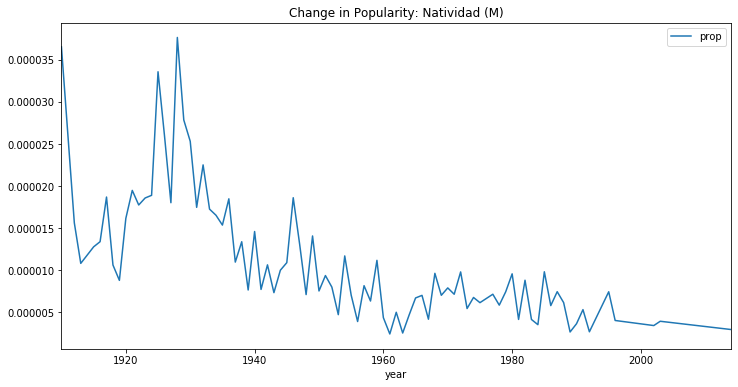

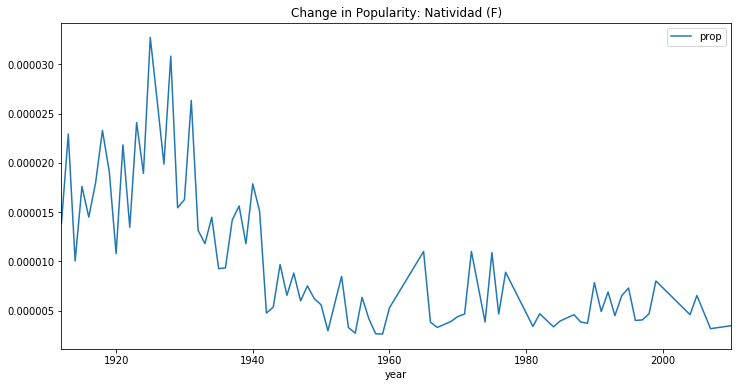

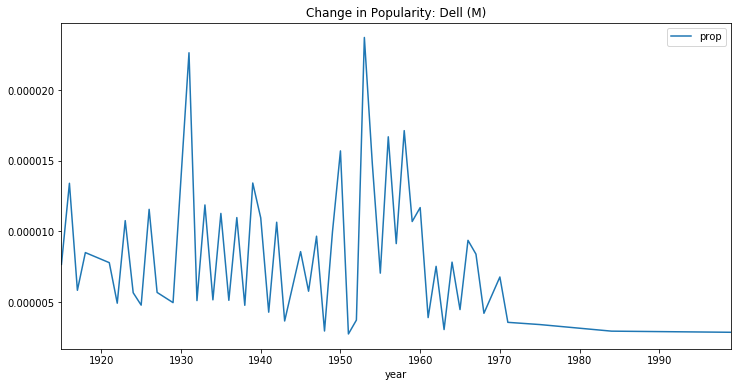

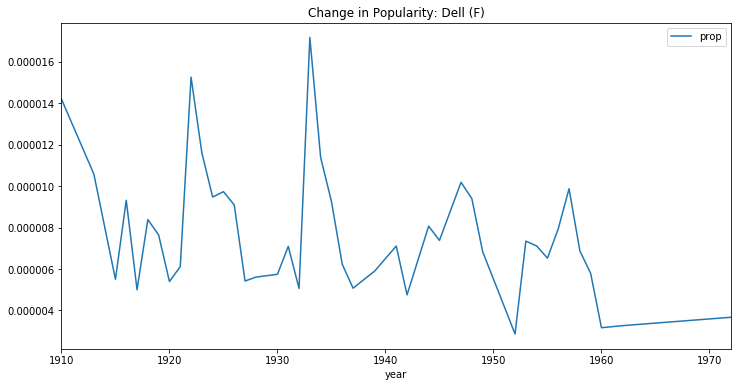

In [26]:
a = x.NameFlip(2) # WARNING: This takes ~ 2 minutes to run

In [53]:
# NamePopularityPlot

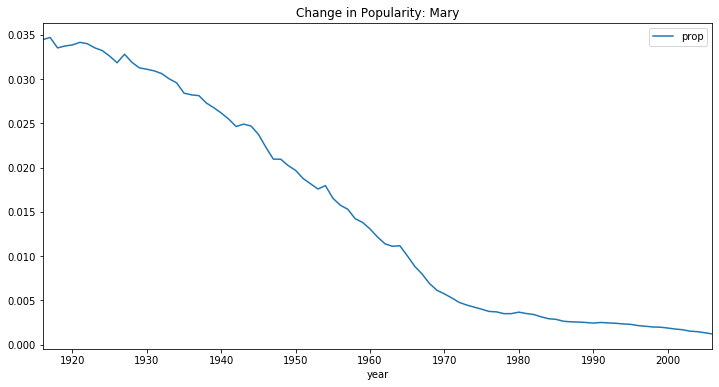

In [27]:
x.NamePopularityPlot('Mary', yearRange = (1916, 2006))

In [55]:
# Top5NamesPerYear

In [56]:
x = BabyNames('names.csv')

In [29]:
x.Top5NamesPerYear(2016).sample(10)

Rank 1   Num  Rank 2   Num   Rank 3   Num   Rank 4   Num   Rank 5  \
state                                                                        
MA     Benjamin   488  Olivia   424     Emma   411  William   409    James   
WI       Olivia   347  Oliver   331    Henry   328     Emma   321     Liam   
AL      William   429   James   349      Ava   330     John   321    Mason   
NM          Mia   131  Sophia   116   Elijah   115     Noah   113     Liam   
SD         Emma    66  Oliver    66     Liam    60   Harper    56     Owen   
PA         Emma   750  Olivia   726     Noah   719     Liam   713      Ava   
MO       Olivia   403    Emma   384  William   372     Liam   342    Mason   
CA          Mia  2794  Sophia  2751     Noah  2701     Emma  2602   Olivia   
AR          Ava   193  Elijah   172     Emma   164  William   161    Mason   
ND       Oliver    73  Harper    65   Olivia    65     Emma    63  William   

        Num  
state        
MA      400  
WI      318  
AL      291  
NM       96  
SD       55  
PA      671  
MO      338  
CA     2543  
AR      154  
ND       63

In [30]:
# CHANGE IN POPULARITY

In [59]:
x = BabyNames('names.csv')

In [31]:
x.ChangeOfPopularity()

(year        1910     2017    delta
 name                              
 Liam         0.0  18728.0  18728.0
 Olivia     176.0  18632.0  18456.0
 Noah        44.0  18440.0  18396.0
 Emma      2591.0  19738.0  17147.0
 Ava         30.0  15902.0  15872.0
 Logan        0.0  15053.0  15053.0
 Isabella   105.0  15100.0  14995.0
 Sophia     235.0  14831.0  14596.0
 Mason        0.0  13514.0  13514.0
 Mia          0.0  13437.0  13437.0,
 '\n',
 '\n',
 year         1910    2017    delta
 name                              
 Mary      22907.0  2371.0 -20536.0
 Helen     10484.0   726.0  -9758.0
 Dorothy    7314.0   460.0  -6854.0
 Ruth       7209.0  1184.0  -6025.0
 Margaret   8229.0  2229.0  -6000.0
 Mildred    5690.0    30.0  -5660.0
 Willie     4628.0   240.0  -4388.0
 Marie      4778.0   407.0  -4371.0
 Ethel      4141.0    11.0  -4130.0
 Florence   4277.0   213.0  -4064.0)

In [61]:
x.ChangeOfPopularity(fromYear = 1953, toYear = 1999, top = 4)

(year       1953     1999    delta
 name                             
 Jacob     563.0  35385.0  34822.0
 Matthew  2370.0  30428.0  28058.0
 Joshua    131.0  27274.0  27143.0
 Emily    1302.0  26539.0  25237.0,
 '\n',
 '\n',
 year       1953     1999    delta
 name                             
 Robert  86389.0  14539.0 -71850.0
 James   86216.0  18556.0 -67660.0
 Linda   61340.0    861.0 -60479.0
 John    80225.0  20346.0 -59879.0)

In [62]:
# TOP 10 BABY NAMES

In [63]:
x = BabyNames("names.csv")

In [64]:
x.Count()

308180519

In [65]:
x.Count(state = "AK")

state
AK    430161
Name: number, dtype: int64

In [66]:
x.Count(year = 1950)

year
1950    3330537
Name: number, dtype: int64

In [67]:
x.Count(state = "WY")

state
WY    435016
Name: number, dtype: int64

In [68]:
x.Top10BabyNames()

In [69]:
x.Top10BabyNames(year = 1999, state = "IL")

### Story Time: TV and Baby Names


We decided to take a look at characters from a few TV shows and Movies in the 90s and 2000s and see their affect on baby names. One key reason for this curiosity is that we looked at made-up fantasy names from the TV show Game of Thrones, and we noticed that people actually named their children Khaleesi and Daenerys.


#### Game of Thrones 

Game of Thrones first aired in April 2011 and ended in May 2019. We looked at names of the main characters to see if there were any interesting finds in people naming kids after TV show characters. 

##### Daenerys/ Khaleesi

Khaleesi means Queen in the show and refers to the character Daenerys, and as you can see below, people started naming kids after Khaleesi after the show first aired in 20111 and then Daenerys starting in 2013 and it has been increasing in popularity. 


In [198]:
x = BabyNames("names.csv")

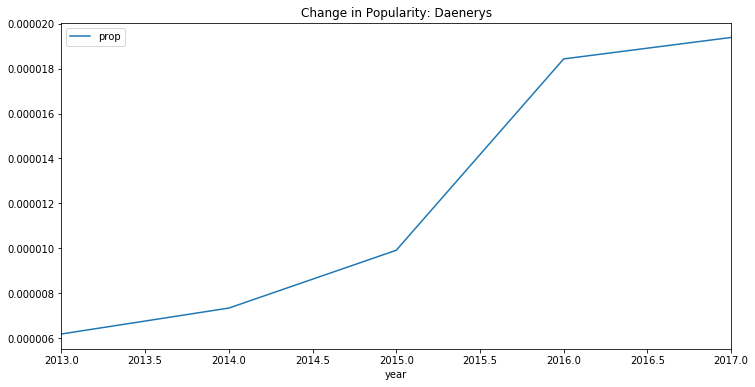

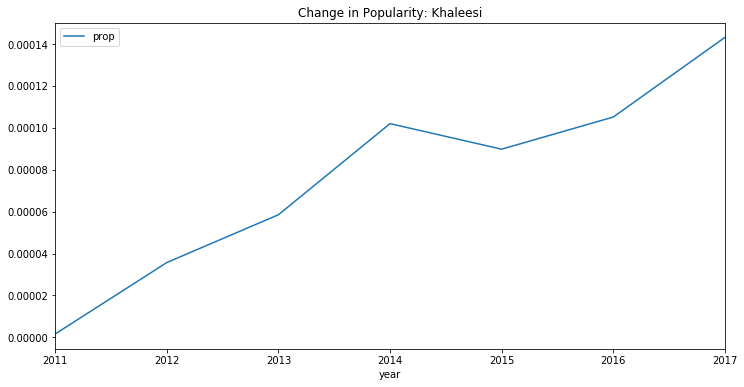

In [32]:
x.NamePopularityPlot(name ="Daenerys")
x.NamePopularityPlot(name ="Khaleesi")

##### Jon

Jon is the protagonist of the show, but since Jon is a fairly common name, we decided to look at the popularity near 2011 to when the show started to see if there were any uptick in baby names of Jon. It looks like the name was decreasing in popularity after 2010, but then there was a slight boost up until 2014.

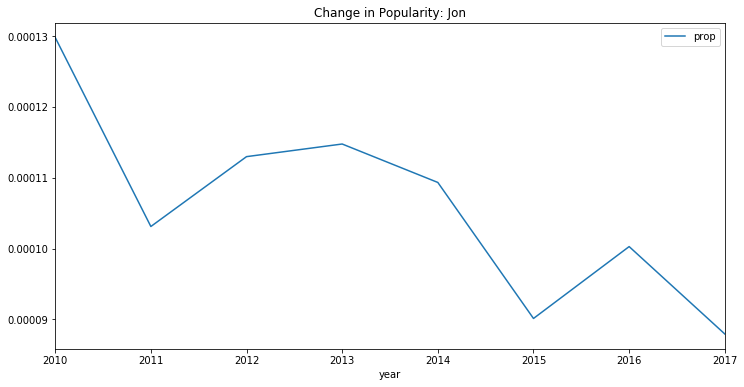

In [33]:
x.NamePopularityPlot(name ="Jon", yearRange=(2010,2017))

##### Tyrion and Sansa

It looks like some other characters such as Tyrion and Sansa, who aren't classified as central to the plot, started growing popular in baby names starting in 2015 with Tyrion dropping off while Sansa continued to grow.

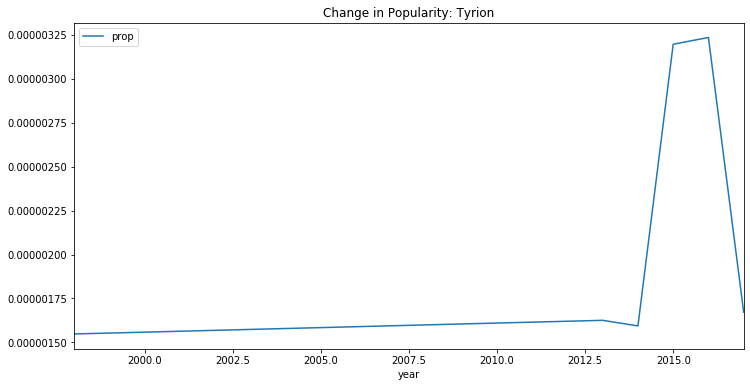

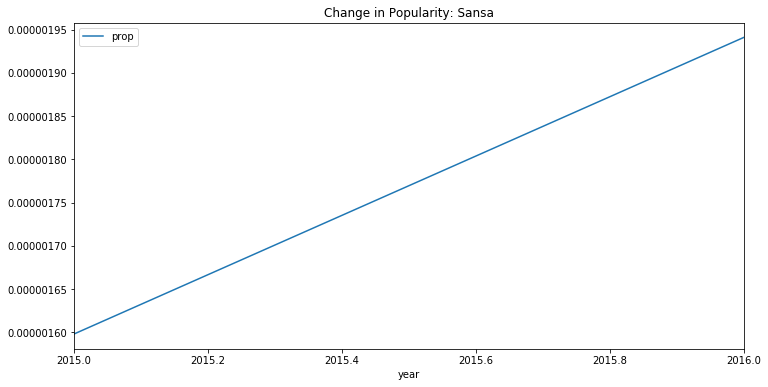

In [34]:
x.NamePopularityPlot(name ="Tyrion")
x.NamePopularityPlot(name ="Sansa")

##### Arya

Finally, looking at Arya who is a younger, badass character in the show and fan favorite, her name indicate a substantial uptick in popularity and exponential growth startin ing 2011 when the show airs. 


It's pretty interesting that the Game of Thrones chracters that are reflected in baby names with increasing trends tend to be the female character names.

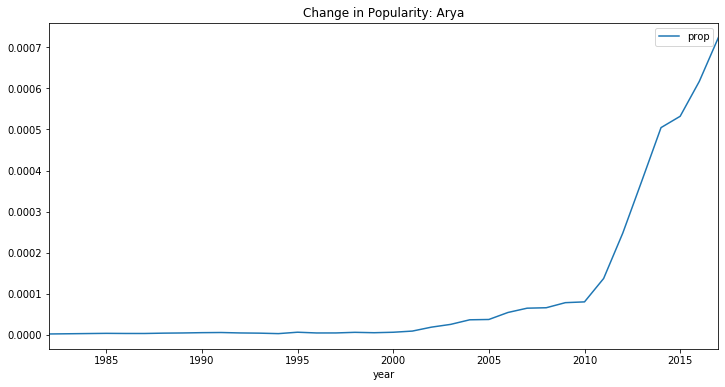

In [35]:
x.NamePopularityPlot(name ="Arya")

#### Friends

##### Ross, Rachel, Monica, Chandler, Joey, and Phoebe

Looking at Friends which first aired in 1994 and ended in 2004, we decided to look at the main characters (Ross, Rachel, Monica, Chandler, Joey, and Phoebe) of the show and see if there were any changes in baby naming trends with the main character names.

Rachel, Ross, and Monica seem to have a slight uptick in the mid 90s when the show was starting up, but then dropped down before the start of 2000. 

Chandler seemed to have increased in 1994 and stayed popular until 2000 before it tapered down. 

Joey has been trending down which since before the show, and the show seemed to do very little to increase the name's popularity.

Phoebe, on the other hand, seemed to be have jumpstarted in 1994 when the show started and has been trending up since. 


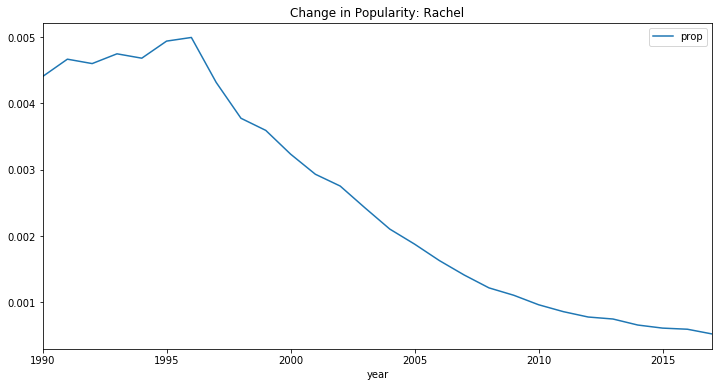

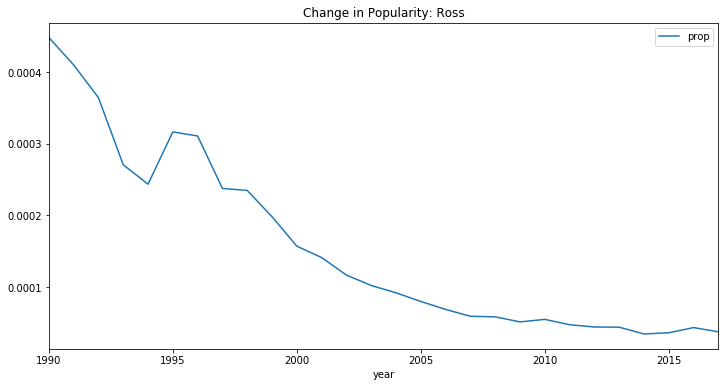

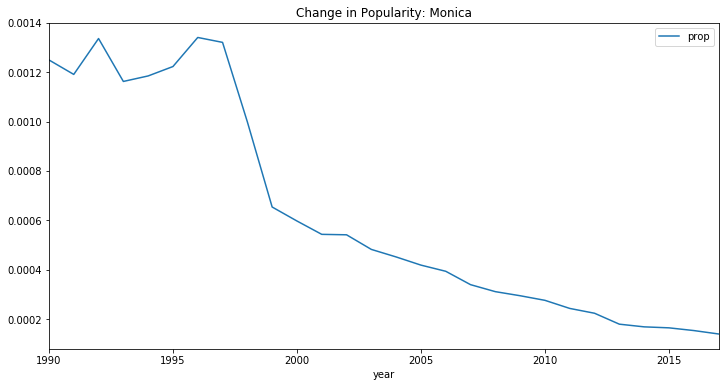

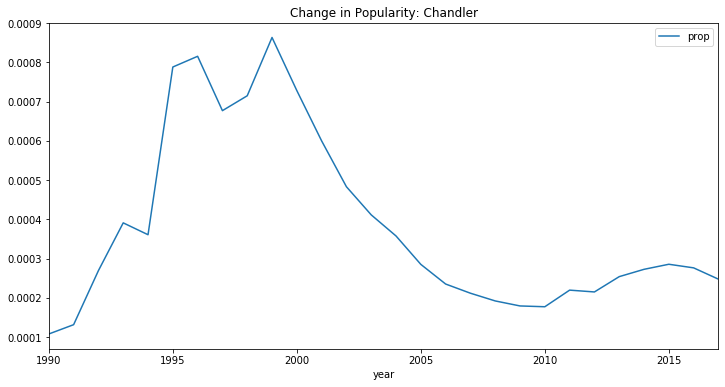

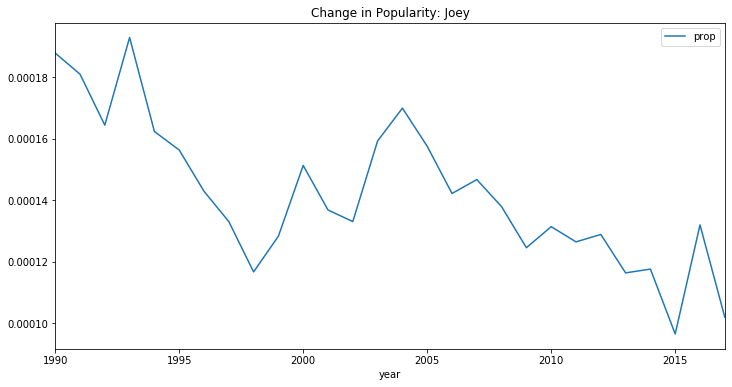

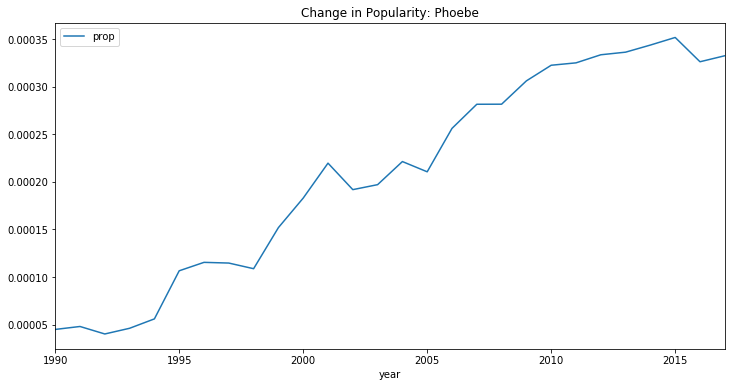

In [36]:
x.NamePopularityPlot(name ="Rachel",yearRange=(1990,2017))
x.NamePopularityPlot(name ="Ross",yearRange=(1990,2017))
x.NamePopularityPlot(name ="Monica",yearRange=(1990,2017))
x.NamePopularityPlot(name ="Chandler",yearRange=(1990,2017))
x.NamePopularityPlot(name ="Joey",yearRange=(1990,2017))
x.NamePopularityPlot(name ="Phoebe",yearRange=(1990,2017))


### Exercise 2- Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

In [2]:
cnx = pymysql.connect(user='root', \
      password='MSIA5EVER', \
      host= '127.0.0.1', \
      port=3306, \
      db='world', \
      autocommit=True)

In [3]:
df_country = pd.read_sql_query('select * from Country', con=cnx)
df_city = pd.read_sql_query('select * from city', con=cnx)
df_countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx)

#### Problem 1

Query displays all the fields from the Country table for the top 10 populous countries whose population is greater than 50,000,000 in descending order of population

In [4]:
#pure sql command
prob1 = 'select * from country where population > 50000000 order by population DESC limit 10'
pd.read_sql_query(prob1, con =cnx)

Code                Name      Continent                     Region  \
0  CHN               China           Asia               Eastern Asia   
1  IND               India           Asia  Southern and Central Asia   
2  USA       United States  North America              North America   
3  IDN           Indonesia           Asia             Southeast Asia   
4  BRA              Brazil  South America              South America   
5  PAK            Pakistan           Asia  Southern and Central Asia   
6  RUS  Russian Federation         Europe             Eastern Europe   
7  BGD          Bangladesh           Asia  Southern and Central Asia   
8  JPN               Japan           Asia               Eastern Asia   
9  NGA             Nigeria         Africa             Western Africa   

   SurfaceArea  IndepYear  Population  LifeExpectancy        GNP     GNPOld  \
0    9572900.0      -1523  1277558000            71.4   982268.0   917719.0   
1    3287263.0       1947  1013662000            62.5   447114.0   430572.0   
2    9363520.0       1776   278357000            77.1  8510700.0  8110900.0   
3    1904569.0       1945   212107000            68.0    84982.0   215002.0   
4    8547403.0       1822   170115000            62.9   776739.0   804108.0   
5     796095.0       1947   156483000            61.1    61289.0    58549.0   
6   17075400.0       1991   146934000            67.2   276608.0   442989.0   
7     143998.0       1971   129155000            60.2    32852.0    31966.0   
8     377829.0       -660   126714000            80.7  3787042.0  4192638.0   
9     923768.0       1960   111506000            51.6    65707.0    58623.0   

       LocalName           GovernmentForm                HeadOfState  Capital  \
0       Zhongquo         People'sRepublic                Jiang Zemin     1891   
1   Bharat/India         Federal Republic   Kocheril Raman Narayanan     1109   
2  United States         Federal Republic             George W. Bush     3813   
3      Indonesia                 Republic          Abdurrahman Wahid      939   
4         Brasil         Federal Republic  Fernando Henrique Cardoso      211   
5       Pakistan                 Republic       Mohammad Rafiq Tarar     2831   
6        Rossija         Federal Republic             Vladimir Putin     3580   
7     Bangladesh                 Republic          Shahabuddin Ahmad      150   
8   Nihon/Nippon  Constitutional Monarchy                    Akihito     1532   
9        Nigeria         Federal Republic          Olusegun Obasanjo     2754   

  Code2  
0    CN  
1    IN  
2    US  
3    ID  
4    BR  
5    PK  
6    RU  
7    BD  
8    JP  
9    NG

In [5]:
#pandas commands using dfs

df_country[df_country.Population > 50000000].sort_values(by = ['Population'], ascending = False).head(10)

Code                Name      Continent                     Region  \
41   CHN               China           Asia               Eastern Asia   
99   IND               India           Asia  Southern and Central Asia   
223  USA       United States  North America              North America   
98   IDN           Indonesia           Asia             Southeast Asia   
30   BRA              Brazil  South America              South America   
164  PAK            Pakistan           Asia  Southern and Central Asia   
181  RUS  Russian Federation         Europe             Eastern Europe   
21   BGD          Bangladesh           Asia  Southern and Central Asia   
109  JPN               Japan           Asia               Eastern Asia   
155  NGA             Nigeria         Africa             Western Africa   

     SurfaceArea  IndepYear  Population  LifeExpectancy        GNP     GNPOld  \
41     9572900.0    -1523.0  1277558000            71.4   982268.0   917719.0   
99     3287263.0     1947.0  1013662000            62.5   447114.0   430572.0   
223    9363520.0     1776.0   278357000            77.1  8510700.0  8110900.0   
98     1904569.0     1945.0   212107000            68.0    84982.0   215002.0   
30     8547403.0     1822.0   170115000            62.9   776739.0   804108.0   
164     796095.0     1947.0   156483000            61.1    61289.0    58549.0   
181   17075400.0     1991.0   146934000            67.2   276608.0   442989.0   
21      143998.0     1971.0   129155000            60.2    32852.0    31966.0   
109     377829.0     -660.0   126714000            80.7  3787042.0  4192638.0   
155     923768.0     1960.0   111506000            51.6    65707.0    58623.0   

         LocalName           GovernmentForm                HeadOfState  \
41        Zhongquo         People'sRepublic                Jiang Zemin   
99    Bharat/India         Federal Republic   Kocheril Raman Narayanan   
223  United States         Federal Republic             George W. Bush   
98       Indonesia                 Republic          Abdurrahman Wahid   
30          Brasil         Federal Republic  Fernando Henrique Cardoso   
164       Pakistan                 Republic       Mohammad Rafiq Tarar   
181        Rossija         Federal Republic             Vladimir Putin   
21      Bangladesh                 Republic          Shahabuddin Ahmad   
109   Nihon/Nippon  Constitutional Monarchy                    Akihito   
155        Nigeria         Federal Republic          Olusegun Obasanjo   

     Capital Code2  
41    1891.0    CN  
99    1109.0    IN  
223   3813.0    US  
98     939.0    ID  
30     211.0    BR  
164   2831.0    PK  
181   3580.0    RU  
21     150.0    BD  
109   1532.0    JP  
155   2754.0    NG

#### Problem 2

Query displays the continents (of which countries have population >0) and displays the number of countries and total population in alphanumeric ascending order of country name

In [6]:
#pure sql command
prob2 = 'select Continent, count(*) As Number_Countries, sum(population) As Population from country where population > 0 \
group by Continent order by 1 ASC '
pd.read_sql_query(prob2, con =cnx)

Continent  Number_Countries    Population
0           Asia                51  3.705026e+09
1         Europe                46  7.300746e+08
2  North America                37  4.829930e+08
3         Africa                57  7.844750e+08
4        Oceania                27  3.040115e+07
5  South America                14  3.457800e+08

In [7]:
#pandas commands using dfs
countries = pd.DataFrame(df_country[df_country.Population > 0].groupby('Continent').count().Name)
#rename column to Number_Countries
countries.rename(columns = {'Name':'Number_Countries'}, inplace = True)
pop = pd.DataFrame(df_country[df_country.Population > 0].groupby('Continent').sum().Population)

#index is the same for both and is automatically sorted alphanumerically by continent
pd.concat([countries, pop], axis=1)


Number_Countries  Population
Continent                                  
Africa                       57   784475000
Asia                         51  3705025700
Europe                       46   730074600
North America                37   482993000
Oceania                      27    30401150
South America                14   345780000

#### Problem 3

Query displays the top 10 populous cities and corresponfing population in USA in order of population

In [8]:
#pure sql command
prob3 = 'select city.Name As City, city.population from city inner join country ON city.CountryCode = country.code \
where country.code = \'USA\' order by city.population DESC limit 10 '
pd.read_sql_query(prob3, con =cnx)

City  population
0      New York     8008278
1   Los Angeles     3694820
2       Chicago     2896016
3       Houston     1953631
4  Philadelphia     1517550
5       Phoenix     1321045
6     San Diego     1223400
7        Dallas     1188580
8   San Antonio     1144646
9       Detroit      951270

In [9]:
#pandas commands using dfs

#filter out top 10 cities in America
x = df_city[df_city.CountryCode == 'USA'].head(10)
#filter just on Name and Population fields
x = x[['Name','Population']]
#rename "Name" to "City"
x.rename(columns = {"Name":"City"}, inplace= True)
x


City  Population
3792      New York     8008278
3793   Los Angeles     3694820
3794       Chicago     2896016
3795       Houston     1953631
3796  Philadelphia     1517550
3797       Phoenix     1321045
3798     San Diego     1223400
3799        Dallas     1188580
3800   San Antonio     1144646
3801       Detroit      951270

#### Problem 4

Query displays the top 10 countries and languages with the most speakers of that country's official language(s)

In [10]:
#pure sql command
prob4 = 'select country.Name, Language, (Percentage * population) / 100 \
from countrylanguage \
inner join country on countrylanguage.CountryCode = country.code \
where IsOfficial = True \
order by 3 DESC limit 10'
pd.read_sql_query(prob4, con =cnx)

Name    Language  (Percentage * population) / 100
0               China     Chinese                     1.175353e+09
1               India       Hindi                     4.044512e+08
2       United States     English                     2.399437e+08
3              Brazil  Portuguese                     1.658621e+08
4  Russian Federation     Russian                     1.272448e+08
5          Bangladesh     Bengali                     1.261844e+08
6               Japan    Japanese                     1.255736e+08
7              Mexico     Spanish                     9.106940e+07
8             Germany      German                     7.501637e+07
9             Vietnam  Vietnamese                     6.929418e+07

In [28]:
#pandas commands using dfs

#filter out countrylanguage table to just official languages
lang = df_countrylanguage[df_countrylanguage.IsOfficial == 'T']
country = df_country[['Code','Name','Population']]

#merge the lang and country dataframes on countrycode
result = pd.merge(country,lang, left_on = 'Code', right_on = 'CountryCode' )

#create (Percentage * population) / 10 (i.e. number of language speakers)
result['(Percentage * population) / 100'] = result['Percentage']*result['Population']/100

#sort and limit 10
result[['Name','Language','(Percentage * population) / 100']]\
    .sort_values(by=['(Percentage * population) / 100'],ascending = False).head(10)


Name    Language  (Percentage * population) / 100
45                China     Chinese                     1.175353e+09
92                India       Hindi                     4.044511e+08
218       United States     English                     2.399437e+08
33               Brazil  Portuguese                     1.658621e+08
175  Russian Federation     Russian                     1.272448e+08
22           Bangladesh     Bengali                     1.261844e+08
102               Japan    Japanese                     1.255736e+08
132              Mexico     Spanish                     9.106940e+07
57              Germany      German                     7.501637e+07
225             Vietnam  Vietnamese                     6.929418e+07

#### Problem 5

Query displays the top 5 languages spoken in the world

In [27]:
#pure sql command
prob5 = 'select Language, sum((Percentage * population) / 100) \
from countrylanguage \
inner join country ON countrylanguage.CountryCode = country.code \
group by Language \
order by 2 desc limit 5'
pd.read_sql_query(prob5, con =cnx)

Language  sum((Percentage * population) / 100)
0  Chinese                          1.191844e+09
1    Hindi                          4.056331e+08
2  Spanish                          3.550295e+08
3  English                          3.470779e+08
4   Arabic                          2.338392e+08

In [49]:
#pandas commands using dfs

#filter out countrylanguage table to just official languages
country = df_country[['Code','Name','Population']]

#merge the lang table and country dataframes on countrycode
result = pd.merge(country,df_countrylanguage, left_on = 'Code', right_on = 'CountryCode' )

#create (Percentage * population) / 10 (i.e. number of language speakers)
result['(Percentage * population) / 100'] = result['Percentage']*result['Population']/100

result = result.groupby('Language').sum()

result.drop(columns = ['Population','Percentage'], inplace = True)
result.rename(columns = {'(Percentage * population) / 100':'sum((Percentage * population) / 100)'}, inplace= True)
result.sort_values(by = 'sum((Percentage * population) / 100)', ascending = False).head(5)

sum((Percentage * population) / 100)
Language                                      
Chinese                           1.191844e+09
Hindi                             4.056331e+08
Spanish                           3.550295e+08
English                           3.470779e+08
Arabic                            2.338392e+08